# Import


In [278]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.svm import SVC, SVR
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics.pairwise import rbf_kernel


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import QuantileTransformer

from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import DBSCAN

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [279]:


plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Wine

In [280]:
df = datasets.load_wine()

In [281]:
type(df)

sklearn.utils._bunch.Bunch

In [282]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [283]:
feat = df['data']
tar = df['target']

In [284]:
feat.shape

(178, 13)

In [285]:
df['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [286]:
wine = pd.DataFrame(feat, columns=df['feature_names'])

In [287]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [288]:
wine.hist()

array([[<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>],
       [<Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>],
       [<Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>],
       [<Axes: title={'center': 'proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

Error in callback <function flush_figures at 0x00000175463149A0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
pd.value_counts(tar) / len(tar)

C:\Users\admin\AppData\Local\Temp\ipykernel_24624\3020060716.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(tar) / len(tar)


1    0.398876
0    0.331461
2    0.269663
Name: count, dtype: float64

In [ ]:
wine[~wine.isna()].count()/len(wine)

alcohol                         1.0
malic_acid                      1.0
ash                             1.0
alcalinity_of_ash               1.0
magnesium                       1.0
total_phenols                   1.0
flavanoids                      1.0
nonflavanoid_phenols            1.0
proanthocyanins                 1.0
color_intensity                 1.0
hue                             1.0
od280/od315_of_diluted_wines    1.0
proline                         1.0
dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wine, tar, test_size=0.2, random_state=42)

In [ ]:
pipe = make_pipeline(StandardScaler(), SVC())

In [ ]:
pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('svc', SVC())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [ ]:
grid = {'svc__C':[1,10, 100, 1000],
        'svc__gamma':[0.001, 0.0001],
        'svc__kernel':['rbf', 'linear', 'poly', 'sigmoid'],
        'svc__coef0':[0.0, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
        }

In [ ]:
grid_search = GridSearchCV(pipe, grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy') 

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 10, 100, 1000],
                         'svc__coef0': [0.0, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
                         'svc__gamma': [0.001, 0.0001],
                         'svc__kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=2)

In [ ]:
cv_res = pd.DataFrame (data=grid_search.cv_results_, columns=grid_search.cv_results_.keys())

In [ ]:
cv_res.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__coef0,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
67,0.005452,0.004899,0.006304,0.006265,10,0.1,0.001,sigmoid,"{'svc__C': 10, 'svc__coef0': 0.1, 'svc__gamma'...",1.000000,1.000000,1.000000,0.928571,1.000000,0.985714,0.028571,1
59,0.006997,0.005937,0.003949,0.004860,10,0.0,0.001,sigmoid,"{'svc__C': 10, 'svc__coef0': 0.0, 'svc__gamma'...",1.000000,1.000000,1.000000,0.928571,1.000000,0.985714,0.028571,1
127,0.004954,0.003737,0.005367,0.005909,100,0.1,0.0001,sigmoid,"{'svc__C': 100, 'svc__coef0': 0.1, 'svc__gamma...",1.000000,1.000000,1.000000,0.928571,1.000000,0.985714,0.028571,1
119,0.009294,0.003752,0.001748,0.002722,100,0.0,0.0001,sigmoid,"{'svc__C': 100, 'svc__coef0': 0.0, 'svc__gamma...",1.000000,1.000000,1.000000,0.928571,1.000000,0.985714,0.028571,1
80,0.008734,0.001777,0.001371,0.001720,10,1.0,0.001,rbf,"{'svc__C': 10, 'svc__coef0': 1.0, 'svc__gamma'...",1.000000,0.965517,0.964286,0.964286,1.000000,0.978818,0.017301,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.003004,0.003989,0.015895,0.013068,10,0.0,0.001,poly,"{'svc__C': 10, 'svc__coef0': 0.0, 'svc__gamma'...",0.413793,0.413793,0.392857,0.392857,0.392857,0.401232,0.010256,167
55,0.008410,0.006110,0.005433,0.006329,1,10.0,0.0001,sigmoid,"{'svc__C': 1, 'svc__coef0': 10.0, 'svc__gamma'...",0.413793,0.413793,0.392857,0.392857,0.392857,0.401232,0.010256,167
52,0.010421,0.007982,0.001575,0.001349,1,10.0,0.0001,rbf,"{'svc__C': 1, 'svc__coef0': 10.0, 'svc__gamma'...",0.413793,0.413793,0.392857,0.392857,0.392857,0.401232,0.010256,167
47,0.003513,0.005686,0.003004,0.006008,1,5.0,0.0001,sigmoid,"{'svc__C': 1, 'svc__coef0': 5.0, 'svc__gamma':...",0.413793,0.413793,0.392857,0.392857,0.392857,0.401232,0.010256,167


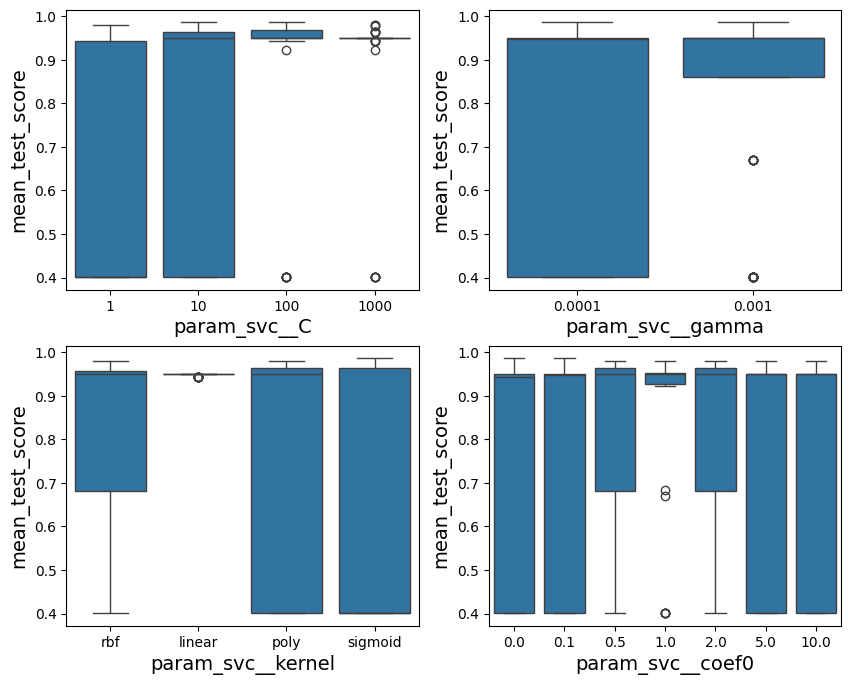

In [ ]:
f, ax = plt.subplots(2,2,figsize=(10, 8))

param = ['param_svc__C', 'param_svc__gamma', 'param_svc__kernel', 'param_svc__coef0']
for i, par in enumerate(param):
    sns.boxplot(data=cv_res, x=par, y='mean_test_score', ax= ax[i//2, i%2])


In [ ]:
grid_search.best_params_

{'svc__C': 10,
 'svc__coef0': 0.0,
 'svc__gamma': 0.001,
 'svc__kernel': 'sigmoid'}

In [ ]:
dir(grid_search)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run

In [ ]:
grid_search.best_score_

0.9857142857142858

In [ ]:
accuracy_score(y_test, grid_search.predict(X_test))

1.0

In [ ]:
spipe = make_pipeline(StandardScaler(), SGDClassifier())

In [ ]:
spipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('sgdclassifier', SGDClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'sgdclassifier': SGDClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'sgdclassifier__alpha': 0.0001,
 'sgdclassifier__average': False,
 'sgdclassifier__class_weight': None,
 'sgdclassifier__early_stopping': False,
 'sgdclassifier__epsilon': 0.1,
 'sgdclassifier__eta0': 0.0,
 'sgdclassifier__fit_intercept': True,
 'sgdclassifier__l1_ratio': 0.15,
 'sgdclassifier__learning_rate': 'optimal',
 'sgdclassifier__loss': 'hinge',
 'sgdclassifier__max_iter': 1000,
 'sgdclassifier__n_iter_no_change': 5,
 'sgdclassifier__n_jobs': None,
 'sgdclassifier__penalty': 'l2',
 'sgdclassifier__power_t': 0.5,
 'sgdclassifier__random_state': None,
 'sgdclassifier__shuffle': True,
 'sgdclassifier__tol': 0.001,
 'sgdclassifier__validation_fraction': 0.1,
 'sgdclassifier__verbose': 0,


In [ ]:
sgrid = [{'sgdclassifier__alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
        'sgdclassifier__loss':['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],
        'sgdclassifier__penalty':['l2', 'l1', 'elasticnet'],
        'sgdclassifier__l1_ratio':[0.15, 0.25, 0.5, 0.75, 0.9]
        }]
sgrid_search = GridSearchCV(spipe, sgrid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [ ]:
sgrid_search.fit(X_train, y_train)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('sgdclassifier', SGDClassifier())]),
             n_jobs=-1,
             param_grid=[{'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1,
                                                   1.0, 10.0],
                          'sgdclassifier__l1_ratio': [0.15, 0.25, 0.5, 0.75,
                                                      0.9],
                          'sgdclassifier__loss': ['hinge', 'log_loss',
                                                  'modified_huber',
                                                  'squared_hinge',
                                                  'perceptron'],
                          'sgdclassifier__penalty': ['l2', 'l1',
                                                     'elasticnet']}],
             scoring='accuracy', verbose=2)

In [ ]:
sgrid_search.best_params_

{'sgdclassifier__alpha': 0.0001,
 'sgdclassifier__l1_ratio': 0.15,
 'sgdclassifier__loss': 'squared_hinge',
 'sgdclassifier__penalty': 'l1'}

In [ ]:
sgrid_search.best_score_

0.993103448275862

In [ ]:
accuracy_score(y_test, sgrid_search.predict(X_test))

1.0

# Housing

In [ ]:
data = datasets.fetch_california_housing()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
hou = pd.DataFrame(data['data'], columns=data['feature_names'])

In [ ]:
hou

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
def spat_trans(**Kwargs):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    return db


In [ ]:
tar = data['target']

<Axes: ylabel='Count'>

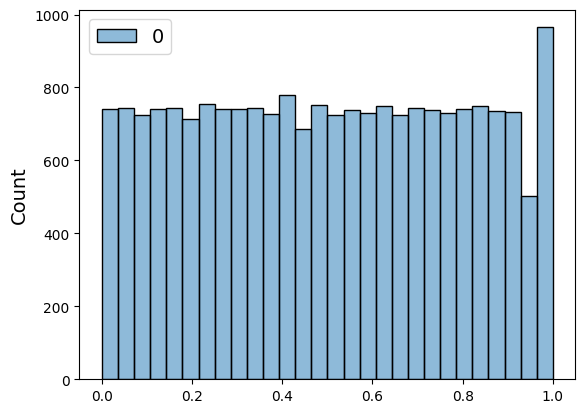

In [ ]:
sns.histplot(quantile_transform(tar.reshape(-1,1), n_quantiles=100, output_distribution='uniform'))

In [ ]:
db = DBSCAN()
col_trans = ColumnTransformer(('spat_trans', db, ['Latitude', 'Longitude']), remainder='passthrough')

In [ ]:
pipe = make_pipeline(col_trans, StandardScaler(), SVC())

In [ ]:
tar_trans = QuantileTransformer( n_quantiles=100, output_distribution='uniform')

In [ ]:
y_trans = tar_trans.fit_transform(tar.reshape(-1,1))

In [ ]:
y_delist = [i[0] for i in y_trans]

In [ ]:
y_delist

[0.9401873722115415,
 0.8834085536213196,
 0.8755244755244757,
 0.8613406795224978,
 0.8623737373737375,
 0.7586736934563022,
 0.8118137900746595,
 0.6950056116722785,
 0.6533333333333333,
 0.7390930582419943,
 0.7834485202906255,
 0.6961279461279463,
 0.6122515477354187,
 0.5494071146245058,
 0.41161616161616166,
 0.32690541781450877,
 0.3806244260789715,
 0.39313131313131316,
 0.409090909090909,
 0.4326599326599327,
 0.3598952487841377,
 0.4146005509641874,
 0.2276612276612276,
 0.17358772914328466,
 0.29487179487179493,
 0.20093795093795086,
 0.1467051467051467,
 0.19372294372294369,
 0.20598845598845592,
 0.2925685425685426,
 0.256969696969697,
 0.2326599326599325,
 0.2113997113997114,
 0.19159335288367543,
 0.20887445887445882,
 0.16161616161616163,
 0.19028999674160962,
 0.1883349625285109,
 0.5498462889767236,
 0.48888888888888893,
 0.3927272727272728,
 0.3696969696969697,
 0.24470511567285758,
 0.5398815743643328,
 0.5202020202020201,
 0.5118931247963506,
 0.3386243386243387,
 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hou, y_delist, test_size=0.2, random_state=42)

In [ ]:
m = KMeans()

In [ ]:
m.fit(X_train[['Latitude', 'Longitude']])

KMeans()

In [ ]:
lable = m.fit_transform(X_train[['Latitude', 'Longitude']])

In [ ]:
lable.shape

(16512, 8)

In [ ]:
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [301]:
# Define DBSCAN transformer
db = make_pipeline(ClusterSimilarity())

# Define ColumnTransformer
col_trans = ColumnTransformer(
    [('spat_trans', db, ['Latitude', 'Longitude'])],
    remainder= 'passthrough'
)

# Define pipeline
pipe = Pipeline([
    ('col_trans', col_trans),
    ('scale', StandardScaler()),
    ('svr', SVR())  # Use SVR instead of SVC for regression
])

# Define grid search parameters
grid = {
    'svr__C': [1, 10, 100],
    'svr__gamma': [0.001, 0.0001],
    'svr__kernel': ['rbf'], 
    'col_trans__spat_trans__clustersimilarity__n_clusters': [3, 4, 5, 6],
}

# Initialize GridSearchCV
search = GridSearchCV(pipe, grid, cv=5, scoring='neg_root_mean_squared_error')

# Fit the model
search.fit(X_train, y_train)


KeyboardInterrupt: 

In [299]:
search.best_params_

{'col_trans__spat_trans__clustersimilarity__n_clusters': 6,
 'svr__C': 100,
 'svr__gamma': 0.001,
 'svr__kernel': 'rbf'}

In [300]:
search.best_score_

-0.15634910464525384